In [1]:
import solver

ModuleNotFoundError: No module named 'solver'

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.paths import repo_path

results_path = f'{repo_path}/CFM_Lancaster/results/'

ModuleNotFoundError: No module named 'src'

In [3]:
ds = xr.open_dataset(f"{results_path}reformatted_output/Single_Dimension_CFM_Output.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:             (station: 2, time: 684)
Coordinates:
    year                (time) float32 ...
  * station             (station) object 'Summit' 'Kan-M'
Dimensions without coordinates: time
Data variables:
    delta_ele           (station, time) float32 ...
    cum_ele             (station, time) float32 ...
    tot_compaction      (station, time) float32 ...
    cum_tot_compaction  (station, time) float32 ...

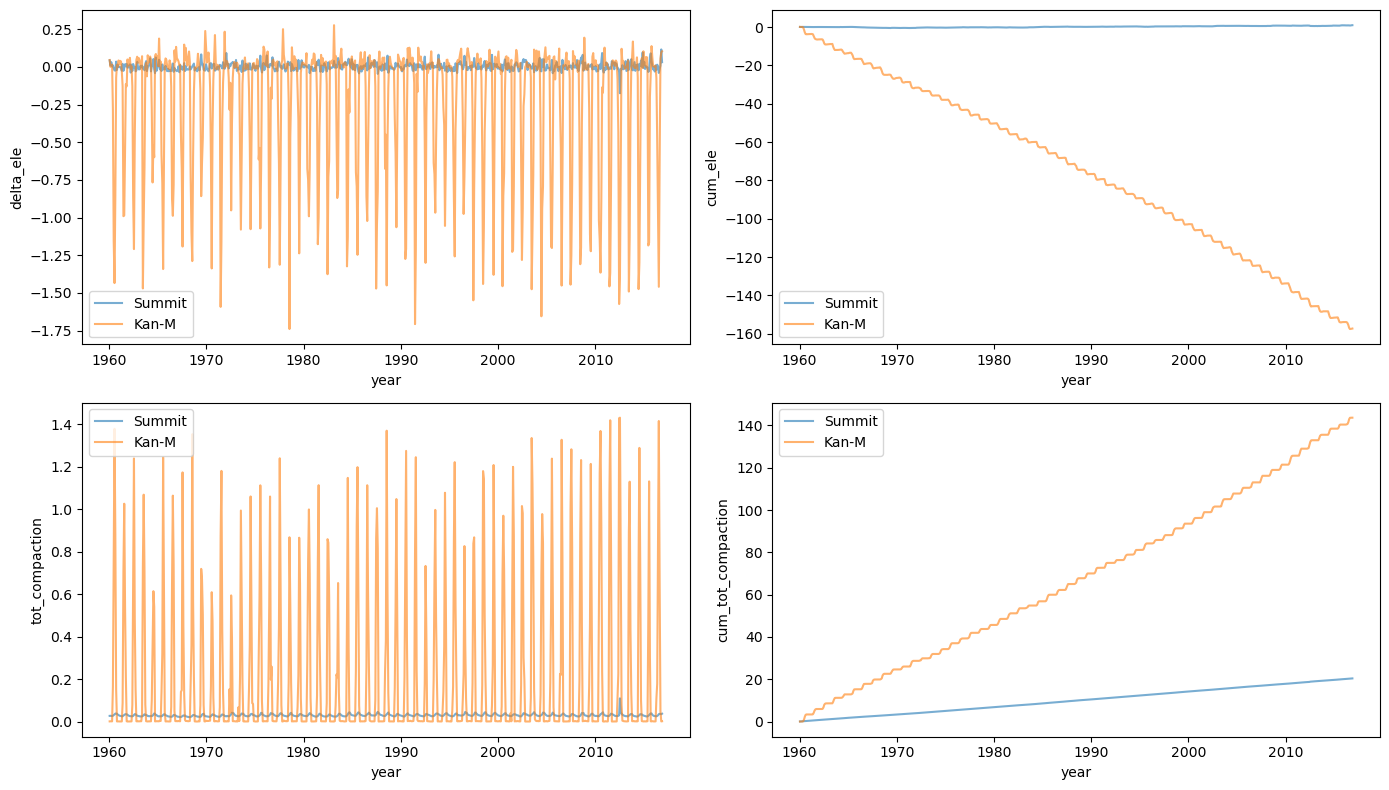

In [11]:
stations = ['Summit','Kan-M']

# outputs = ['delta_ele','cum_ele','tot_compaction','cum_tot_compaction','depth','density']
outputs = ['delta_ele','cum_ele','tot_compaction','cum_tot_compaction','depth','density']
outputs_fullnames = ['Elevation Change / m','Cumulative Elevation Change / m','Total Compaction / m','Cumulative Total Compaction / m']

fig, subplots = plt.subplots(2, 2,figsize=(14,8))
for station in stations:
    for ax,output in zip(subplots.flat,outputs):
        ds[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label=station)
        ax.set_title('')
        ax.legend()
fig.tight_layout()


In [5]:
ds.cum_ele.plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

In [ ]:
/home/jez/Community_Firn_Model_Forked/CommunityFirnModel/CFM_Lancaster/results/reformatted_output/Single_Dimension_CFM_Output.nc

In [ ]:
stations = ['Summit','Kan-M']
ds_list = []
for station in stations:
    results_folder = f"{results_path}{station}/"
    results_filename = f"{results_folder}Results_{station}.hdf5"
    ds = xr.open_dataset(results_filename)

In [3]:
from src.paths import processed_data_path